[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


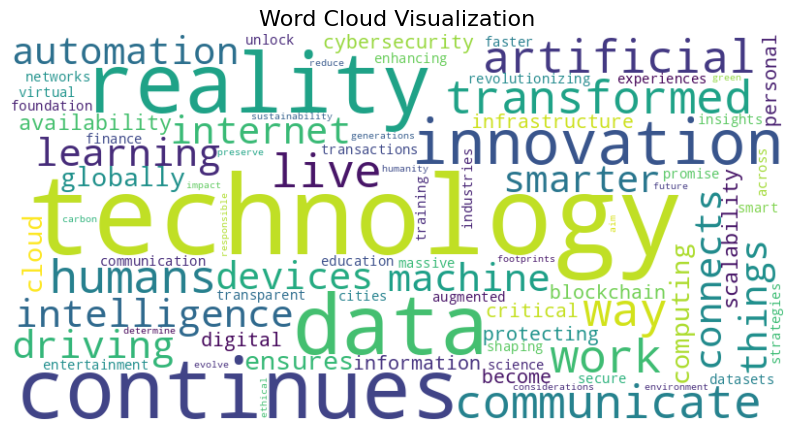

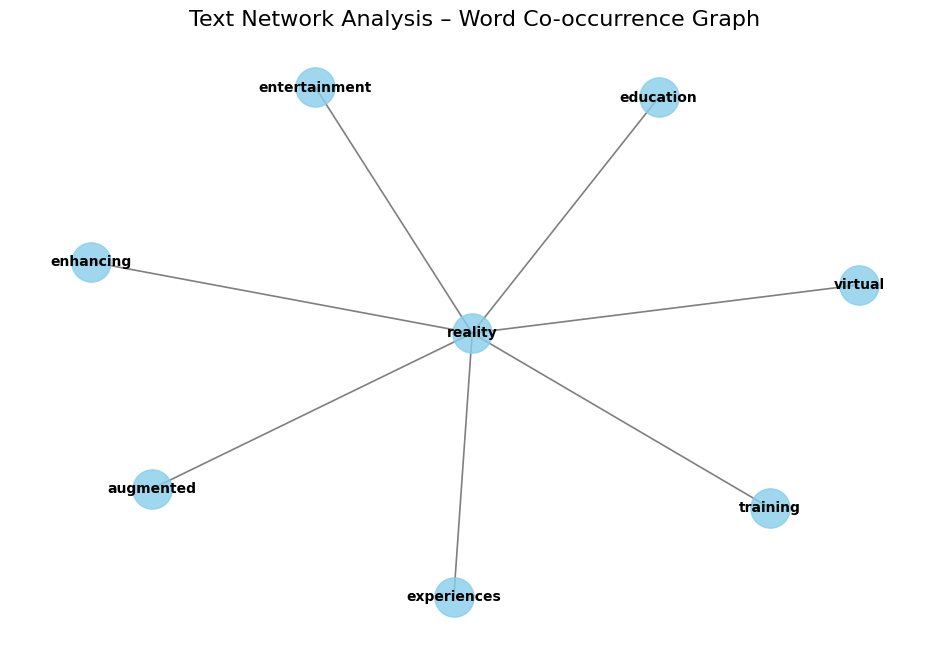

In [2]:
# =====================================================
# Word Cloud + Text Network Analysis Visualization
# =====================================================

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import networkx as nx
from itertools import combinations
from collections import Counter

# ---- Step 1: Download NLTK data ----
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# ---- Step 2: Dataset ----
text = """
Technology has transformed the way humans communicate, work, and live.
Artificial Intelligence and Machine Learning are driving automation and smarter decision-making.
The Internet of Things connects devices globally, while Cloud Computing ensures data availability and scalability.
Cybersecurity has become critical in protecting digital infrastructure and personal information.
Blockchain technology is revolutionizing finance through secure and transparent transactions.
Virtual Reality and Augmented Reality are enhancing education, entertainment, and training experiences.
5G networks promise faster communication and the foundation for smart cities.
Data Science continues to unlock insights from massive datasets, shaping strategies and innovations across industries.
Sustainability and Green Technology aim to reduce carbon footprints and preserve the environment for future generations.
As technology continues to evolve, ethical considerations and responsible innovation will determine its impact on humanity.
"""

# ---- Step 3: Preprocess text ----
tokens = word_tokenize(text.lower())
filtered = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]

# ---- Step 4: Word Cloud Visualization ----
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Visualization", fontsize=16)
plt.show()

# ---- Step 5: Build Co-occurrence Network ----
sentences = sent_tokenize(text.lower())
stop_words = set(stopwords.words('english'))
pairs = []

for sentence in sentences:
    words = [w for w in word_tokenize(sentence) if w.isalpha() and w not in stop_words]
    for w1, w2 in combinations(words, 2):
        pairs.append(tuple(sorted([w1, w2])))

pair_freq = Counter(pairs)

# ---- Step 6: Create Network Graph ----
G = nx.Graph()

for (w1, w2), freq in pair_freq.items():
    if freq > 1:  # add only stronger relationships
        G.add_edge(w1, w2, weight=freq)

# ---- Step 7: Visualize Network ----
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)

nx.draw_networkx_nodes(G, pos, node_size=800, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, width=1.2, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title("Text Network Analysis – Word Co-occurrence Graph", fontsize=16)
plt.axis('off')
plt.show()

In [3]:
!python -m nltk.downloader punkt_tab

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
